# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [12]:
import re
from collections import defaultdict
import pandas as pd

# Load the dataset
# Replace '/content/amazon_reviews_cleaned.csv' with the actual path to your CSV file
data = pd.read_csv('/content/amazon_reviews_cleaned.csv')
dataset = data['Cleaned_Content'].tolist()  # Assuming 'clean_text' is the column containing the reviews

# Helper function to preprocess text (remove punctuation, make lowercase, split into words)
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase
    return text.split()  # Split into words

# (1) Count frequency of all 3-grams (trigrams)
def get_ngrams(text, n=3):
    words = preprocess(text)
    ngrams = []
    for i in range(len(words) - n + 1):
        ngram = tuple(words[i:i+n])
        ngrams.append(ngram)
    return ngrams

# Calculate trigram frequencies across the dataset
trigram_freq = defaultdict(int)
for review in dataset:
    trigrams = get_ngrams(review, n=3)
    for trigram in trigrams:
        trigram_freq[trigram] += 1

# Print trigram frequencies
print("Trigram frequencies:")
for trigram, freq in trigram_freq.items():
    print(f"{trigram}: {freq}")

# (2) Calculate bigram probabilities
def get_bigrams(text):
    words = preprocess(text)
    bigrams = []
    for i in range(len(words) - 1):
        bigram = (words[i], words[i+1])
        bigrams.append(bigram)
    return bigrams

# Count bigram and word frequencies
bigram_freq = defaultdict(int)
word_freq = defaultdict(int)
for review in dataset:
    words = preprocess(review)
    bigrams = get_bigrams(review)
    for word in words:
        word_freq[word] += 1
    for bigram in bigrams:
        bigram_freq[bigram] += 1

# Calculate bigram probabilities
bigram_prob = {}
for bigram, freq in bigram_freq.items():
    word1, word2 = bigram
    bigram_prob[bigram] = freq / word_freq[word1]

# Print bigram probabilities
print("\nBigram probabilities:")
for bigram, prob in bigram_prob.items():
    print(f"{bigram}: {prob:.2f}")

# (3) Extract noun phrases and calculate relative probabilities

# Basic noun phrase extraction function
def extract_noun_phrases(text):
    # Simulated pattern matching - simplistic noun phrase extraction
    phrases = re.findall(r'\b(?:\w+\s){1,2}\w+\b', text)
    phrases = [phrase.lower() for phrase in phrases]
    return phrases

# Count noun phrases across the dataset
noun_phrases = defaultdict(int)
review_noun_phrases = []

for review in dataset:
    phrases = extract_noun_phrases(review)
    review_noun_phrases.append(phrases)
    for phrase in phrases:
        noun_phrases[phrase] += 1

# Calculate relative probabilities for noun phrases in each review
max_frequency = max(noun_phrases.values(), default=1)  # Default to 1 to avoid division by zero
relative_probabilities = []

for phrases in review_noun_phrases:
    row = {}
    for phrase in noun_phrases:
        frequency = phrases.count(phrase)
        relative_prob = frequency / max_frequency
        row[phrase] = relative_prob
    relative_probabilities.append(row)

# Print out the result in a table format
print("\nRelative probabilities table (noun phrases):")
header = "Review".ljust(10) + " | " + " | ".join(noun_phrases.keys())
print(header)
print("-" * len(header))
for i, row in enumerate(relative_probabilities):
    row_data = f"Review {i+1}".ljust(10) + " | " + " | ".join(f"{row[phrase]:.2f}" for phrase in noun_phrases)
    print(row_data)


Trigram frequencies:
('edit', 'august', 'two'): 50
('august', 'two', 'year'): 50
('two', 'year', 'later'): 50
('year', 'later', 'phone'): 50
('later', 'phone', 'still'): 50
('phone', 'still', 'go'): 50
('still', 'go', 'strong'): 50
('go', 'strong', 'even'): 50
('strong', 'even', 'use'): 50
('even', 'use', 'phone'): 50
('use', 'phone', 'throughout'): 50
('phone', 'throughout', 'day'): 50
('throughout', 'day', 'need'): 50
('day', 'need', 'charg'): 50
('need', 'charg', 'everi'): 50
('charg', 'everi', 'hour'): 50
('everi', 'hour', 'phone'): 50
('hour', 'phone', 'case'): 50
('phone', 'case', 'kept'): 50
('case', 'kept', 'protect'): 50
('kept', 'protect', 'still'): 50
('protect', 'still', 'look'): 50
('still', 'look', 'brand'): 50
('look', 'brand', 'new'): 100
('brand', 'new', 'still'): 50
('new', 'still', 'run'): 50
('still', 'run', 'like'): 50
('run', 'like', 'new'): 50
('like', 'new', 'even'): 50
('new', 'even', 'though'): 50
('even', 'though', 'phone'): 50
('though', 'phone', 'renew'): 5

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [14]:
import re
import math
from collections import defaultdict

# Sample dataset - replace this with your actual text data
data = pd.read_csv('/content/amazon_reviews_cleaned.csv')
dataset = data['Cleaned_Content'].tolist()

# Preprocessing function
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Lowercase
    return text.split()  # Split into words

# (1) Build the TF-IDF matrix
def compute_tf(doc_words):
    """Compute term frequency for each word in the document."""
    tf = defaultdict(int)
    total_words = len(doc_words)
    for word in doc_words:
        tf[word] += 1
    # Normalize by total word count
    for word in tf:
        tf[word] /= total_words
    return tf

def compute_idf(docs_words):
    """Compute inverse document frequency for each word in the corpus."""
    num_docs = len(docs_words)
    idf = defaultdict(int)
    for doc_words in docs_words:
        unique_words = set(doc_words)
        for word in unique_words:
            idf[word] += 1
    # Apply IDF formula
    for word in idf:
        idf[word] = math.log(num_docs / (idf[word]))
    return idf

# Calculate TF for each document
docs_words = [preprocess(doc) for doc in dataset]
tf_list = [compute_tf(doc_words) for doc_words in docs_words]

# Calculate IDF for all documents
idf = compute_idf(docs_words)

# Build TF-IDF matrix
tf_idf_matrix = []
for tf in tf_list:
    tf_idf = {word: tf[word] * idf[word] for word in tf}
    tf_idf_matrix.append(tf_idf)

# Print TF-IDF matrix
print("TF-IDF Matrix:")
for i, tf_idf in enumerate(tf_idf_matrix):
    print(f"Document {i+1}: {tf_idf}")

# (2) Rank documents with respect to a query using cosine similarity
query = "The screen is really nice"
query_words = preprocess(query)

# Calculate TF-IDF for the query
query_tf = compute_tf(query_words)
query_tf_idf = {word: query_tf[word] * idf[word] if word in idf else 0 for word in query_tf}

def cosine_similarity(doc_tf_idf, query_tf_idf):
    """Compute cosine similarity between a document vector and a query vector."""
    dot_product = sum(doc_tf_idf[word] * query_tf_idf.get(word, 0) for word in doc_tf_idf)
    doc_magnitude = math.sqrt(sum(weight ** 2 for weight in doc_tf_idf.values()))
    query_magnitude = math.sqrt(sum(weight ** 2 for weight in query_tf_idf.values()))
    if doc_magnitude == 0 or query_magnitude == 0:
        return 0
    return dot_product / (doc_magnitude * query_magnitude)

# Calculate similarity scores
similarity_scores = [cosine_similarity(tf_idf, query_tf_idf) for tf_idf in tf_idf_matrix]

# Rank documents by similarity score
ranked_docs = sorted(enumerate(similarity_scores), key=lambda x: x[1], reverse=True)

# Print ranked documents with their scores
print("\nRanked Documents:")
for doc_index, score in ranked_docs:
    print(f"Document {doc_index + 1} - Similarity: {score:.4f}")


TF-IDF Matrix:
Document 1: {'edit': 0.004137372525537532, 'august': 0.004137372525537532, 'two': 0.0023555031667716066, 'year': 0.0023555031667716066, 'later': 0.004137372525537532, 'phone': 0.01606174662415906, 'still': 0.024824235153225196, 'go': 0.0023555031667716066, 'strong': 0.004137372525537532, 'even': 0.009422012667086426, 'use': 0.014133019000629642, 'throughout': 0.004137372525537532, 'day': 0.0023555031667716066, 'need': 0.007066509500314821, 'charg': 0.007066509500314821, 'everi': 0.004137372525537532, 'hour': 0.008274745051075064, 'case': 0.01654949010215013, 'kept': 0.004137372525537532, 'protect': 0.004137372525537532, 'look': 0.004711006333543213, 'brand': 0.01654949010215013, 'new': 0.01654949010215013, 'run': 0.004137372525537532, 'like': 0.01648852216740125, 'though': 0.004137372525537532, 'renew': 0.011777515833858035, 'ive': 0.01654949010215013, 'never': 0.004711006333543213, 'issu': 0.0023555031667716066, 'requir': 0.004137372525537532, 'troubleshoot': 0.00413737

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

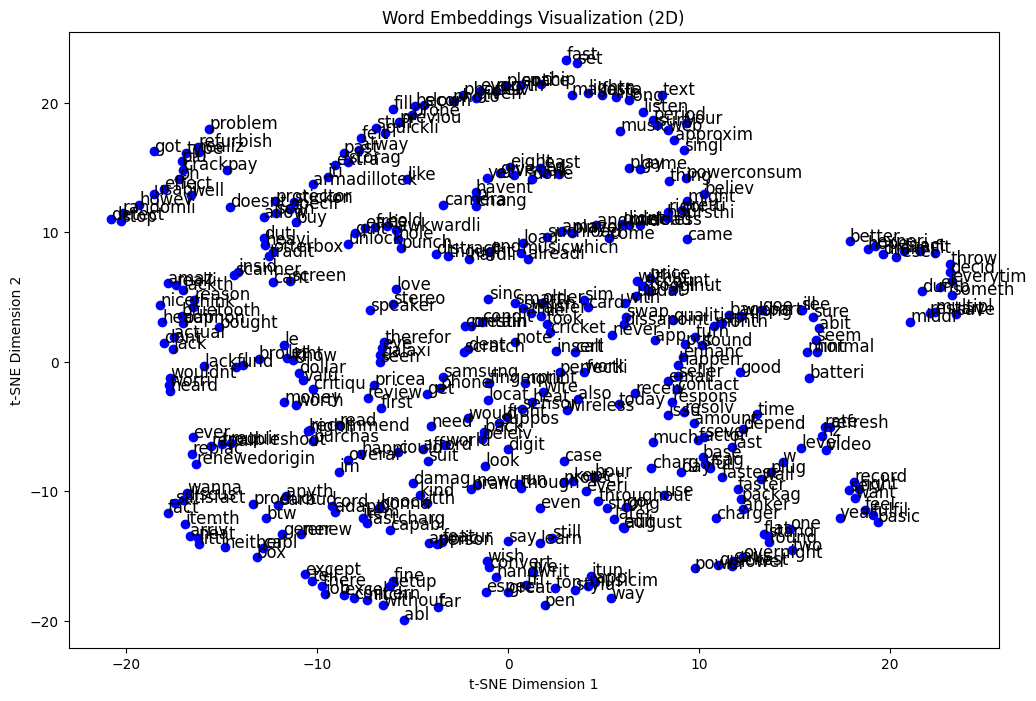

In [16]:
# Write your code here
import re
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

data = pd.read_csv('/content/amazon_reviews_cleaned.csv')
dataset = data['Cleaned_Content'].tolist()

# Step 1: Preprocess the dataset
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text.split()  # Split into words

# Apply preprocessing to each sentence in the dataset
tokenized_dataset = [preprocess(sentence) for sentence in dataset]

# Step 2: Train a 300-dimensional Word2Vec model
embedding_dim = 300
word2vec_model = gensim.models.Word2Vec(
    sentences=tokenized_dataset,
    vector_size=embedding_dim,  # Dimension of the embedding space
    window=5,  # Context window size
    min_count=1,  # Minimum word frequency threshold
    sg=1,  # Use skip-gram model (sg=1); CBOW (sg=0)
    epochs=100  # Number of training epochs for better results on small datasets
)

# Step 3: Visualize the Word Embedding model using t-SNE

# Extract the vocabulary and their corresponding vectors
words = list(word2vec_model.wv.index_to_key)
word_vectors = np.array([word2vec_model.wv[word] for word in words])

# Dimensionality reduction using t-SNE to project into 2D space
tsne = TSNE(n_components=2, random_state=0)
word_vecs_2d = tsne.fit_transform(word_vectors)

# Step 4: Plotting the 2D word vectors
plt.figure(figsize=(12, 8))
for i, word in enumerate(words):
    x, y = word_vecs_2d[i, 0], word_vecs_2d[i, 1]
    plt.scatter(x, y, marker='o', color='blue')
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title("Word Embeddings Visualization (2D)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()







## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


# New Section

https://github.com/Chaitanya1081/Chaitanya_INFO5731_FALL2024/upload/main

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
'''The task provided informative and fulfilling practical experience in converting unstructured data into a formatted form for sentiment analysis. The most difficult parts were establishing precise limits for sentiment classification and striking a balance between efficiently cleaning review text while preserving important information. Working with actual data was fun despite these difficulties, and it highlighted how crucial careful preprocessing is. Although more time would be required for larger datasets or more in-depth annotations, the time allotted felt appropriate for the scope.'''